# **Integration of NTIM into Microplane homogenization**

Verify the implementation of the interface model by comparing the single-point version 
with the vectorized version used in FE models.

In [1]:
%matplotlib widget
from bmcs_matmod.msx import MSX
from bmcs_matmod.ntim import VCoNTIM, VUNTIM
from bmcs_matmod.slide.slide_explorer import SlideExplorer
import matplotlib.pylab as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore');

In [2]:
material_params = dict(
    E_T=1000, gamma_T=0, K_T=0, S_T=0.001, c_T=1, bartau=3, 
    E_N=100, 
    S_N=0.001,
    #S_N=0.005, 
    c_N = 1, m = 0.01, f_t=3, f_c=20, f_c0=10, eta=0.0, # 0.5
)

In [3]:
mp_microplane = dict(K_T=300, gamma_T=3000, bartau=2, f_t=2, eta=0, c_T=1, S_T=0.001, c_N=0.3, S_N = 0.001 );

## Scalar implementation of Coupled NT interface model (CoNTIM)

In [8]:
se_pull = SlideExplorer(n_steps=40, k_max=2)
se_pull.slide_model.trait_set(debug_level=0, **material_params)
#se_pull.slide_model.trait_set(debug_level=5, **mp_microplane)
se_pull.trait_set(s_x_1 = 0, s_y_1 = 0, w_1 = 0.046);
se_pull.run()
#se_pull.interact()

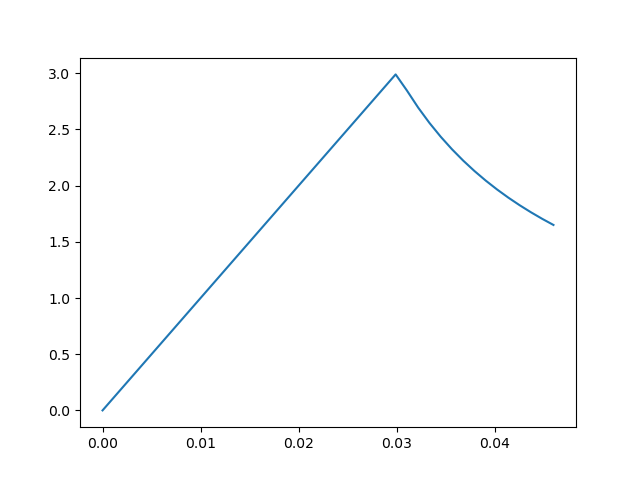

In [10]:
%matplotlib widget
fig, ax = plt.subplots(1,1)
ax.plot(se_pull.w_t, se_pull.Sig_t[:, 2]);

# Vectorized Coupled Normal Tangential Interface Model

In [11]:
mic = VCoNTIM(debug_level=0, k_max=3, **material_params)

In [12]:
n_eps = len(se_pull.w_t)
eps11_range = np.linspace(1e-9, 0.046, n_eps)
eps_range = np.zeros((n_eps, 4)) + 1e-9
eps_range[:, 0] = se_pull.w_t

In [13]:
state_vars = { 
    var: np.zeros((1,) + shape)
    for var, shape in mic.state_var_shapes.items()
}

In [14]:
sig_range = []
Eps_t = []
for i, eps_ab in enumerate(eps_range):
    sig_ab, D_range = mic.get_corr_pred(eps_ab[np.newaxis,...], 1, **state_vars)
    sig_range.append(sig_ab[0,...])

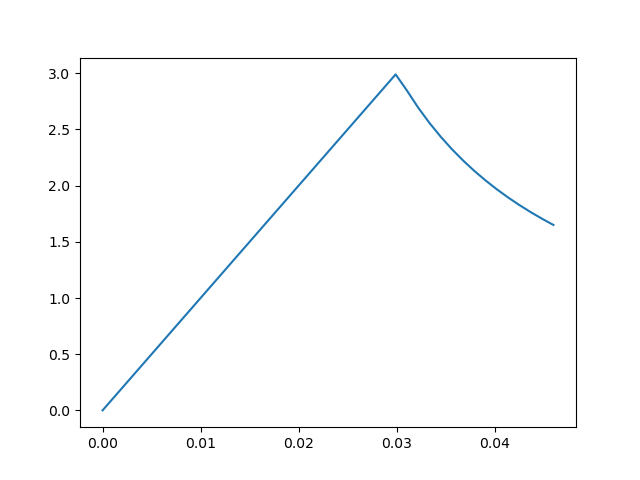

In [15]:
fig, ax = plt.subplots(1,1)
sig11_range = np.array(sig_range)
ax.plot(eps11_range[:len(sig11_range)], sig11_range[...,0])

In [16]:
#mic.interact()